## Univariate Analysis vs Bivariate Analysis vs Multivariate Analysis

 - Please refer below youtube Link for in depth explanation
 

**What question(s) are we trying to solve?**


predicts which passengers survived in the Titanic shipwreck.

Dataset is Titanic Datset. >  https://www.kaggle.com/c/titanic/data

In [1]:
#Survived 	Survived (1) or died (0)
#Pclass 	Passenger’s class
#Name 	Passenger’s name
#Sex 	Passenger’s sex
#Age 	Passenger’s age
#SibSp 	Number of siblings/spouses aboard
#Parch 	Number of parents/children aboard
#Ticket 	Ticket number
#Fare 	Fare
#Cabin 	Cabin
#Embarked 	Port of embarkation

 - Variable Identification
 - Univariate Analysis
 - Bivariate Analysis
 - Multivariate Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")# "whitegrid")
%matplotlib inline 
# use this command so that your plots appear inline in your notebook

In [3]:
from platform import python_version
print("python",python_version())
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

python 3.11.5
pandas 2.0.3
numpy 1.24.3
seaborn 0.13.0


In [4]:
## Lets First Load the Train
df_train = pd.read_csv(r"D:\Notebooks\Practice CML and me\all_ml_dl\Data\Data_Files\Titanic\titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## Use PassengerId as Index
df_train = df_train.set_index("PassengerId")
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variable Identification

**1. First, identify Predictor (Input) and Target (output) variables**

In [6]:
# We have to predict whether the passenger is survived or not so our target(Output) variable will be "Survived" 
# and remaiming columns will be Predictors(Input variables)
y = targets = labels = output_var = df_train["Survived"]
X = predictors = input_var = df_train.loc[:,df_train.columns != "Survived"]

In [7]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [8]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Print the Target and Input Variables
print("Input Variables", list(X.columns))
print("Output Variable", "['Survived']")

Input Variables ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Output Variable ['Survived']


**2. Identify the data type of the variables.**

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
datatype = df_train.dtypes
#col = datatype[(datatype == 'object') | (datatype == 'int64')| (datatype == 'float64')].index.tolist()
num_col = datatype[(datatype == 'float64') | (datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)

Categorical Columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [12]:
df_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Univariate Analysis

1. We explore variables one by one.
2. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

**Continuous Variable Analysis**

 - Measure of central tendency(Mean, Median, Mode) of the variable.
 - Measure of spread(Range,IQR, Variance,Standard Deviation) of the variable.
 - Measure of Shape(Symmetrical Distribution e.g. Normal Distribution,Asymmetrical Distribution (Left or Right Skewed Distribution),Kurtosis(shape of the of the distribution in terms of height or flatness)

**Categorical Variable Analysis**

 - For categorical variables, we will use frequency distribution of each category.e.g Bar Chart, Pie Chart

In [13]:
# Run discriptive statistics of numerical datatypes.
df_train.describe(include = ['float64','int64'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Lets Analysis the Target Variable "Survived"
# Calculate the percentage of people who Survived and Not Survived
df_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
per_sur_nonsur = (df_train["Survived"].value_counts()/df_train.shape[0]*100).round(2)
per_sur_nonsur
# 0 > not-Survived
# 1 > Survived

Survived
0    61.62
1    38.38
Name: count, dtype: float64

**A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable.**

<Axes: xlabel='Survived', ylabel='count'>

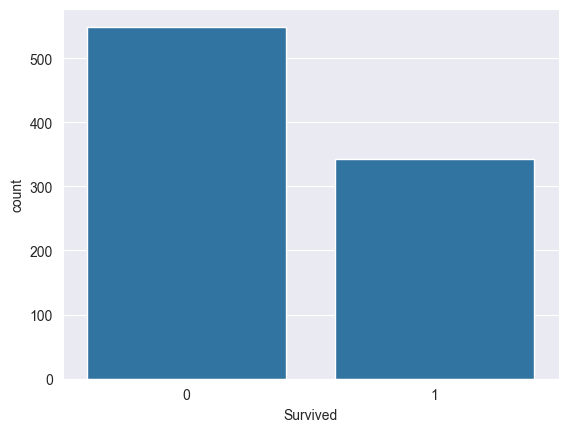

In [16]:
# Lets plot the graph who are survided and not survied as per the column data
sns.countplot(data=df_train,x="Survived")

C:\Users\HP\AppData\Local\Temp\ipykernel_15044\2465456752.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)


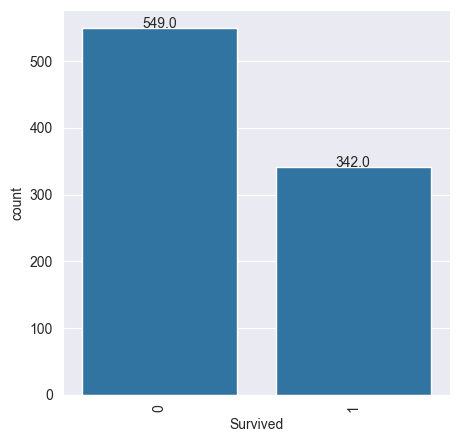

In [17]:
# Lets Display Count on top of countplot
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Survived', data=df_train)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

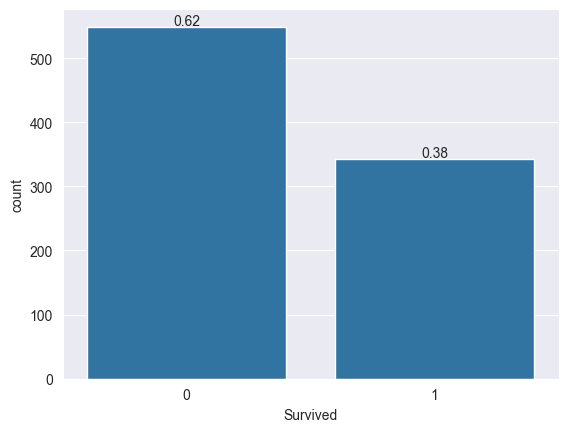

In [18]:
# If we want to display the percentage 
from matplotlib.pyplot import show
titanic = df_train
total = float(len(titanic)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
#ax = sns.countplot(x="class", hue="who", data=titanic) # for Seaborn version 0.7 and more
ax = sns.countplot(x="Survived", data=titanic) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
show()

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [20]:
df_train.Pclass.unique()

array([3, 1, 2], dtype=int64)

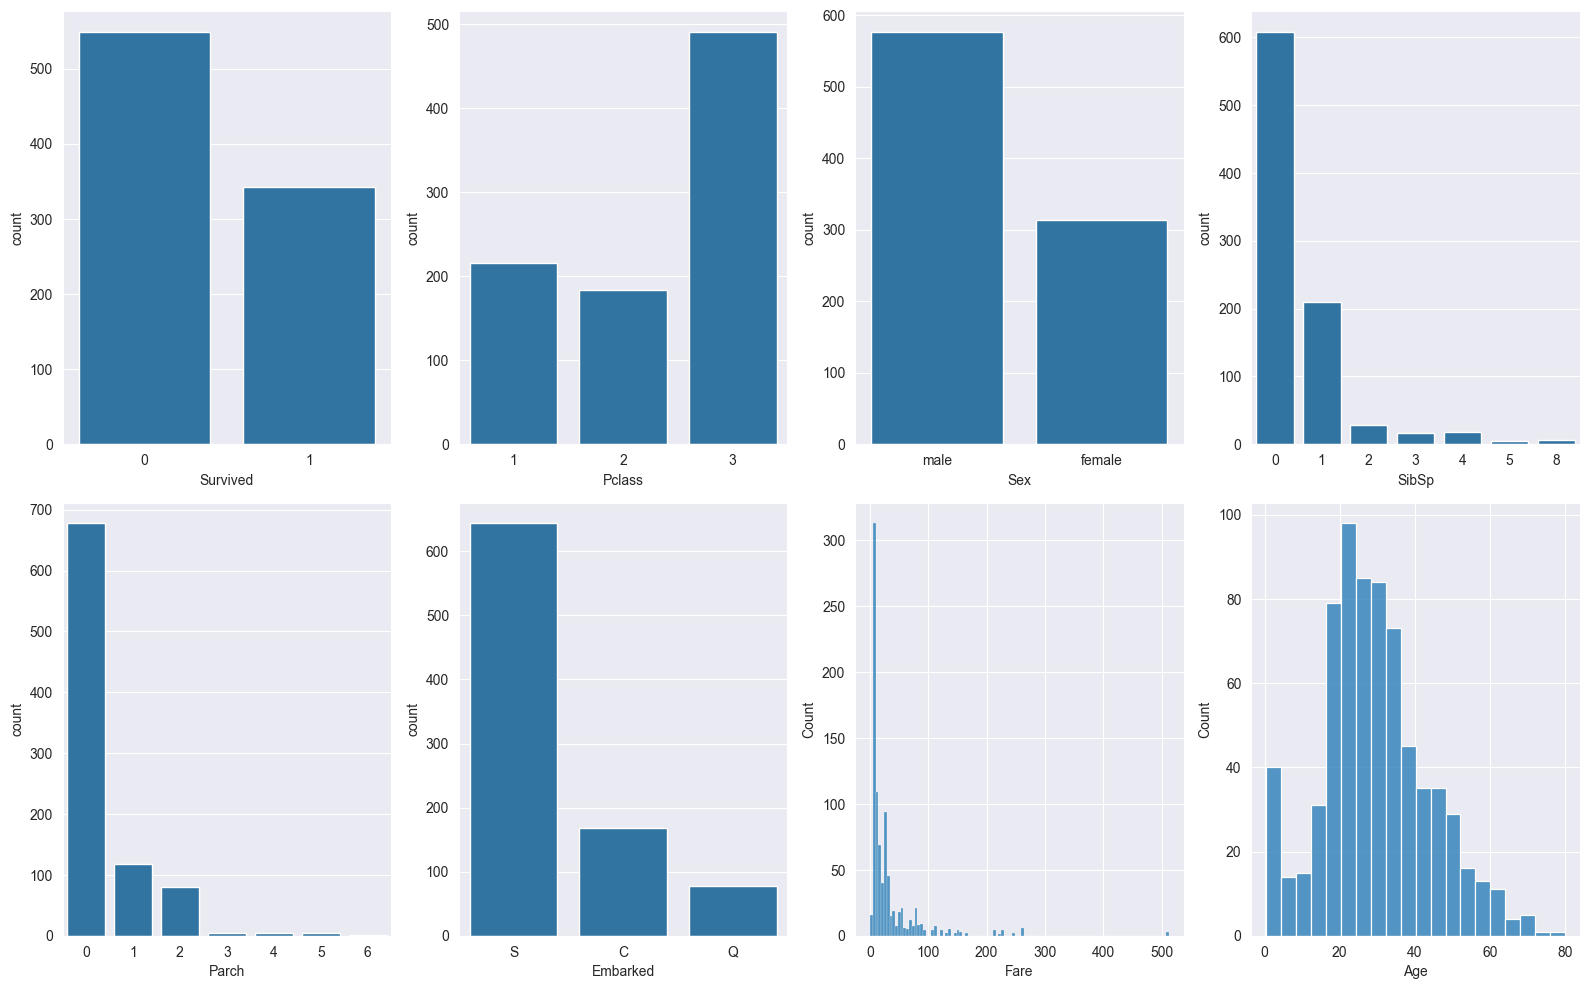

In [21]:
'''
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # supress future warning
# Combined univariate analysis of each variables
fig,axes = plt.subplots(2,4, figsize=(16,10))
sns.countplot('Survived',data=df_train,ax=axes[0,0])
sns.countplot('Pclass',data=df_train,ax=axes[0,1])
sns.countplot('Sex',data=df_train,ax=axes[0,2])
sns.countplot('SibSp',data=df_train,ax=axes[0,3])
sns.countplot('Parch',data=df_train,ax=axes[1,0])
sns.countplot('Embarked',data=df_train,ax=axes[1,1])
#sns.distplot(df_train['Fare'], kde=True,ax=axes[1,2])
sns.histplot(data=df_train,x="Fare",ax=axes[1,2])
sns.histplot(data=df_train,x="Age",ax=axes[1,3] 

'''

import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming 'df_train' is your DataFrame

# Combined univariate analysis of each variables
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

sns.countplot(x='Survived', data=df_train, ax=axes[0, 0])
sns.countplot(x='Pclass', data=df_train, ax=axes[0, 1])
sns.countplot(x='Sex', data=df_train, ax=axes[0, 2])
sns.countplot(x='SibSp', data=df_train, ax=axes[0, 3])
sns.countplot(x='Parch', data=df_train, ax=axes[1, 0])
sns.countplot(x='Embarked', data=df_train, ax=axes[1, 1])

sns.histplot(data=df_train, x="Fare", ax=axes[1, 2])
sns.histplot(data=df_train, x="Age", ax=axes[1, 3])

plt.tight_layout()
plt.show()


Univariate analysis is also used to highlight missing and outlier values. We will look at methods to handle missing and outlier values when we will perform the Data Cleaning part.

## Bivariate Analysis

1. We perform bi-variate analysis with 2 variables for any combination of categorical and continuous variables. 
3. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. 
4. Different methods are used to tackle these combinations during analysis process.

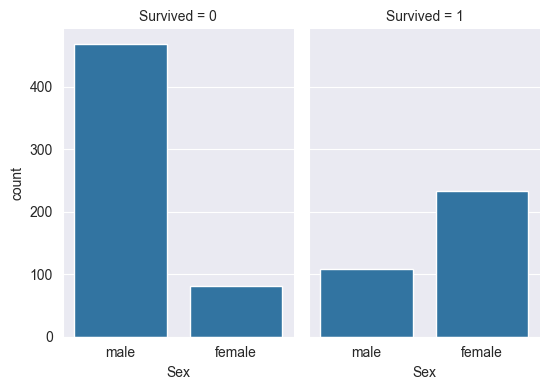

In [22]:
# Lets more elaborate survived data with sex and we will use catplot or countplot
'''
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Sex',hue="Survived",data=df_train)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
'''
sns.catplot(x="Sex",col="Survived",data=df_train, kind="count",height=4, aspect=.7)

We can clearly see that male survial rates is around 19% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.

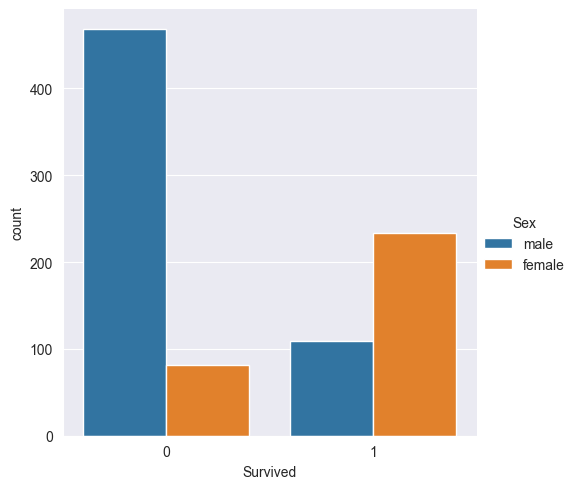

In [23]:
sns.catplot(x='Survived',hue="Sex",data=df_train,kind = "count")

C:\Users\HP\AppData\Local\Temp\ipykernel_15044\2439432110.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)


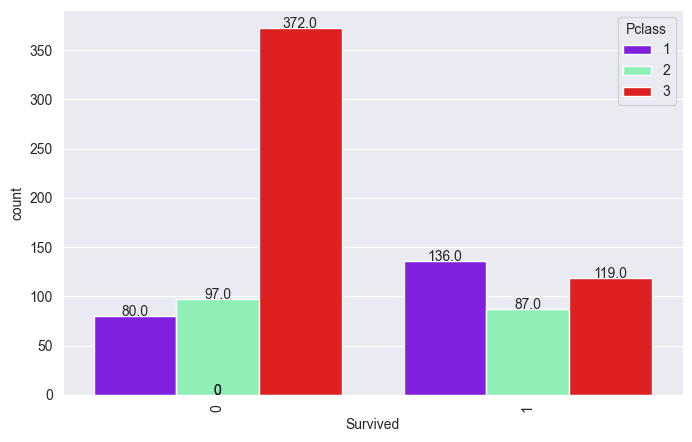

In [24]:
# Lets more elaborate survived data with Pclass
#sns.countplot(data=df_train,x = "Survived",hue="Pclass",palette="rainbow")
fig, ax1 = plt.subplots(figsize=(8,5))
graph = sns.countplot(ax=ax1,data=df_train,x = "Survived",hue="Pclass",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

C:\Users\HP\AppData\Local\Temp\ipykernel_15044\2771790614.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)


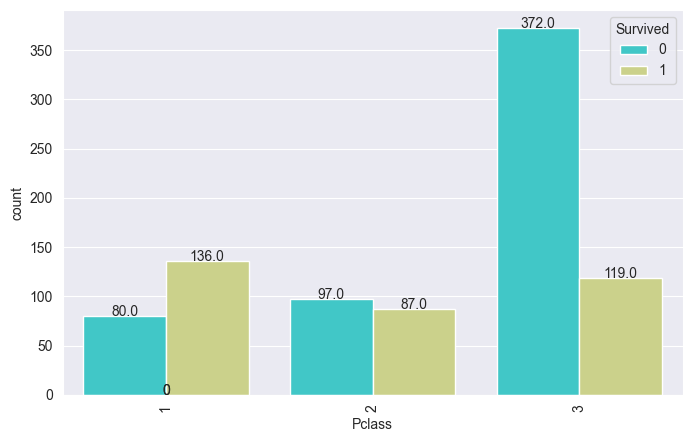

In [25]:
# Lets more elaborate survived data with Pclass and we will use countplot
fig, ax1 = plt.subplots(figsize=(8,5))
graph = sns.countplot(ax=ax1,data=df_train,x = "Pclass",hue="Survived",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

There is also a clear relationship between Pclass and the survival by referring to above plot. Passengers on Pclass1 has a better survial rate of approx 62% whereas passengers on pclass3 had the worst survial rate of approx 25%

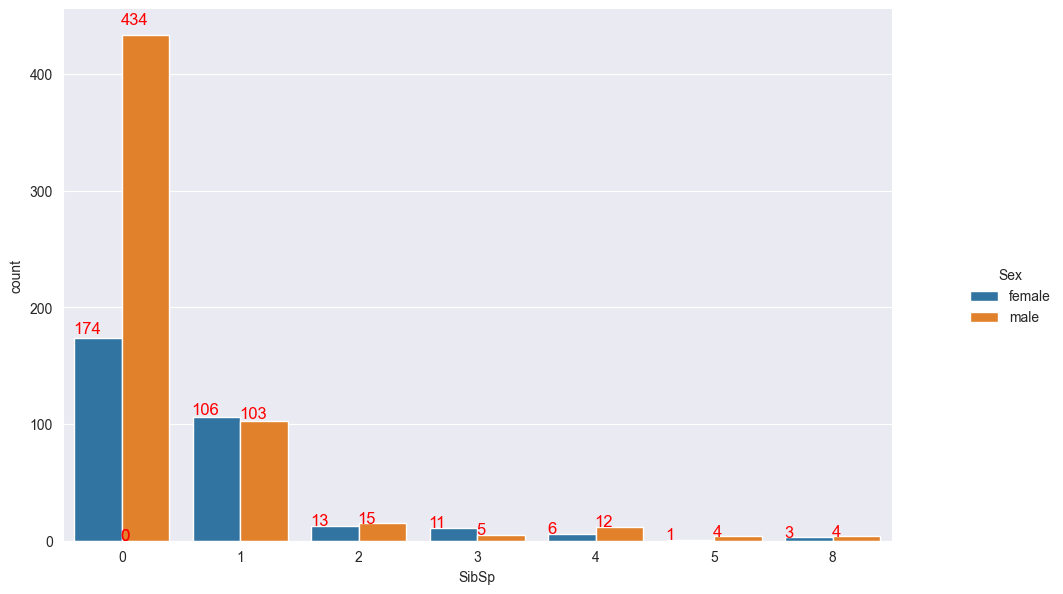

In [26]:
##display Sibling with sex data
#sns.catplot(data=df_train,x="SibSp",hue = "Sex", kind = "count",height=4)
g = sns.catplot(data=df_train,x="SibSp",hue = "Sex", kind = "count",height=4,legend=True)
g.fig.set_size_inches(12,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.0f}'.format(p.get_height()),
            color='red', 
            rotation='horizontal', 
            size='large')

<Axes: title={'center': 'Age'}, xlabel='Survived'>

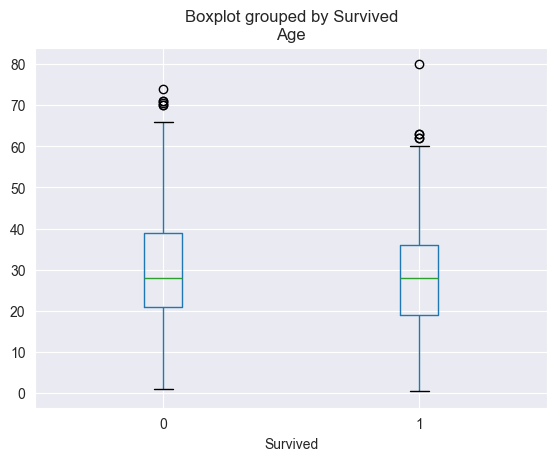

In [27]:
## Lets analyse survided corresponding to Age 
df_train.boxplot(column="Age",by="Survived")

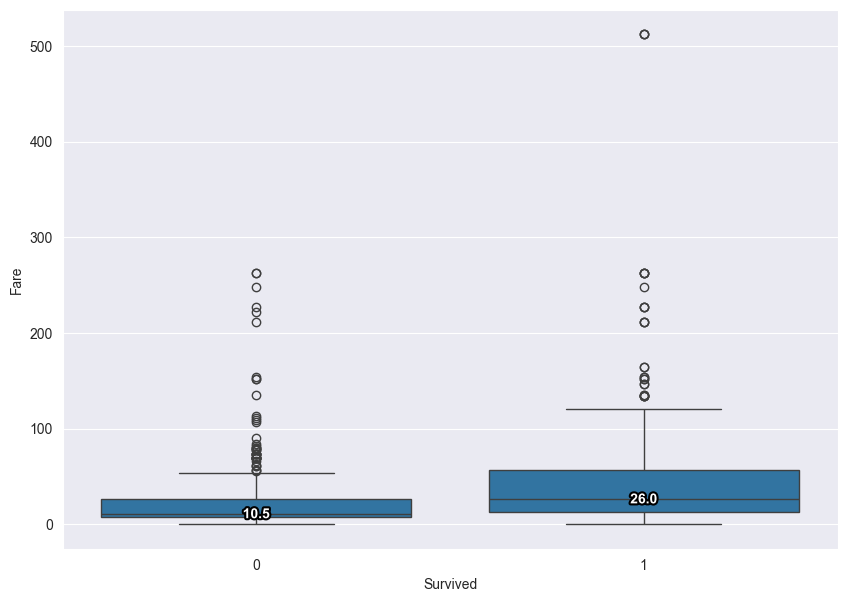

In [28]:
# Plotting a boxplot between 'Survived' and 'Fare' Columns
import matplotlib.patheffects as path_effects

fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips = df_train
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='Survived', y='Fare', 
                           #hue='Sex', 
                           data=df_train,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()


There is also a marginal relationship between the fare and survial rate

**Continous Variable vs Continous Variable**

<Axes: xlabel='Age', ylabel='Fare'>

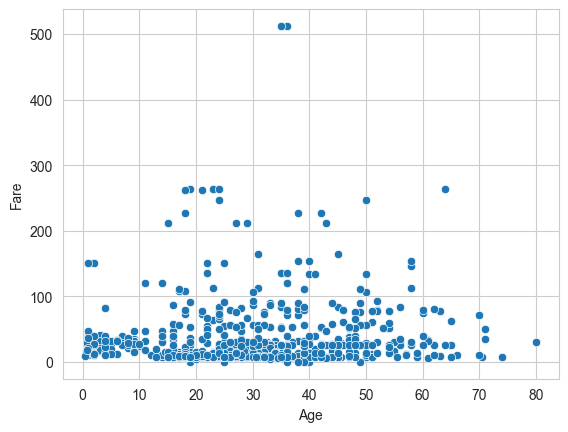

In [29]:
## Plot Fare Distribution Across Age usinf scatter plot
sns.scatterplot(x = df_train["Age"],y = df_train["Fare"])

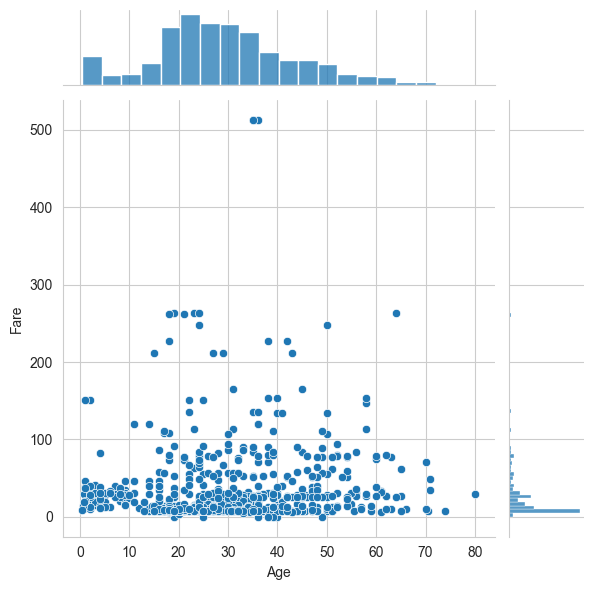

In [30]:
## Plot Fare Distribution Across Age usinf Joint plot
sns.jointplot(x="Age",y="Fare",data=df_train)

## Multivariate Analysis

1. We perform multivariate analysis with more than 2 variables for any combination of categorical and continuous variables. 
2. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. 
3. Different methods are used to tackle these combinations during analysis process.

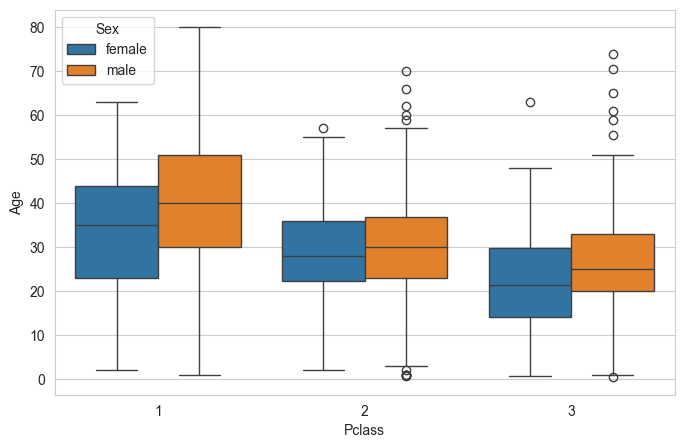

In [31]:
fig, ax1 = plt.subplots(figsize=(8,5))
testPlot = sns.boxplot(ax=ax1, x='Pclass', y='Age', hue='Sex', data=df_train)

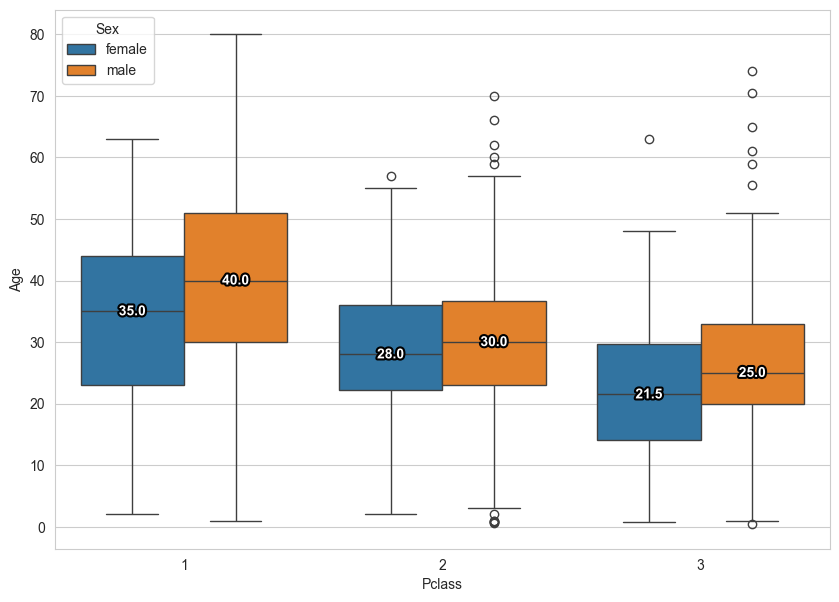

In [32]:
import matplotlib.patheffects as path_effects

fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips = df_train
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='Pclass', y='Age', hue='Sex', data=df_train,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()


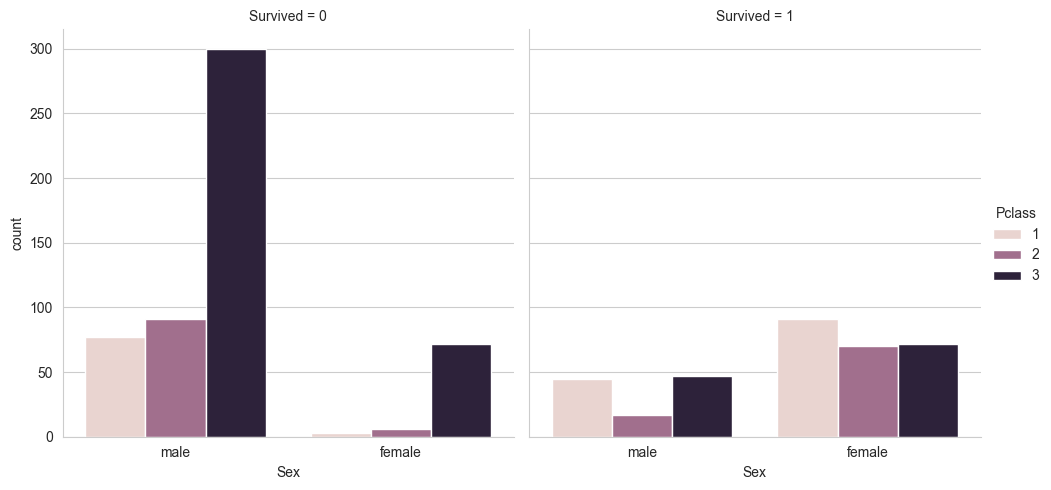

In [33]:
# Lets more elaborate survived data with Pclass and sex and we will use catplot
sns.catplot(data=df_train,col = "Survived",x = "Sex", hue="Pclass",kind = "count")

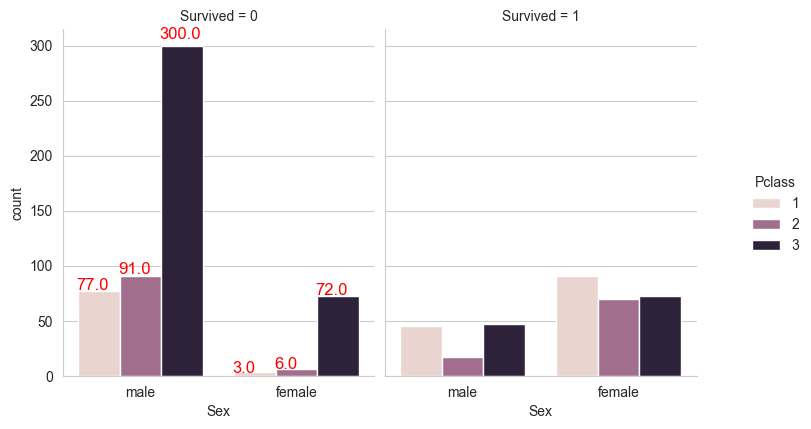

In [34]:
g = sns.catplot(data=df_train,col = "Survived",x = "Sex", hue="Pclass",kind = "count",legend=True)
g.fig.set_size_inches(8,5)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}'.format(p.get_height()),
            color='red', 
            rotation='horizontal', 
            size='large')

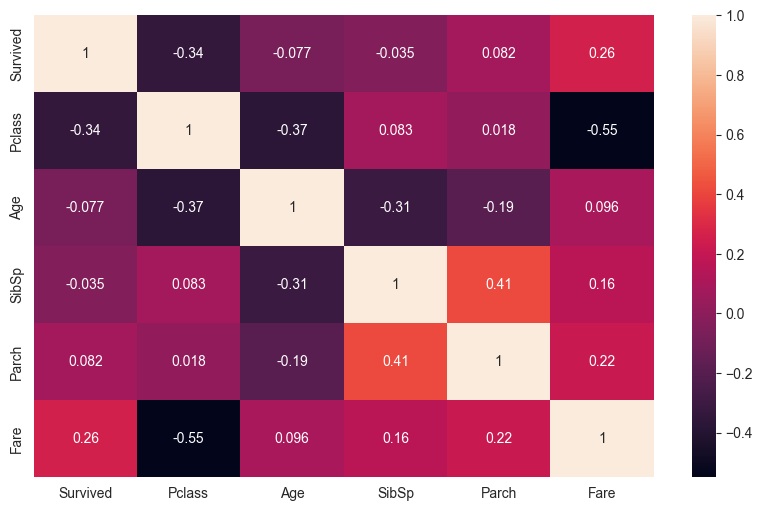

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()


In [36]:
'''
## Co-relation matrix
fig,ax = plt.subplots(figsize = (10,6))
corr = df_train.corr()
sns.heatmap(corr,annot=True)
'''

'\n## Co-relation matrix\nfig,ax = plt.subplots(figsize = (10,6))\ncorr = df_train.corr()\nsns.heatmap(corr,annot=True)\n'

From the above grapg we can say that there is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived. Also there is a negative coorelation between Fare and Pclass, Age and Plcass.

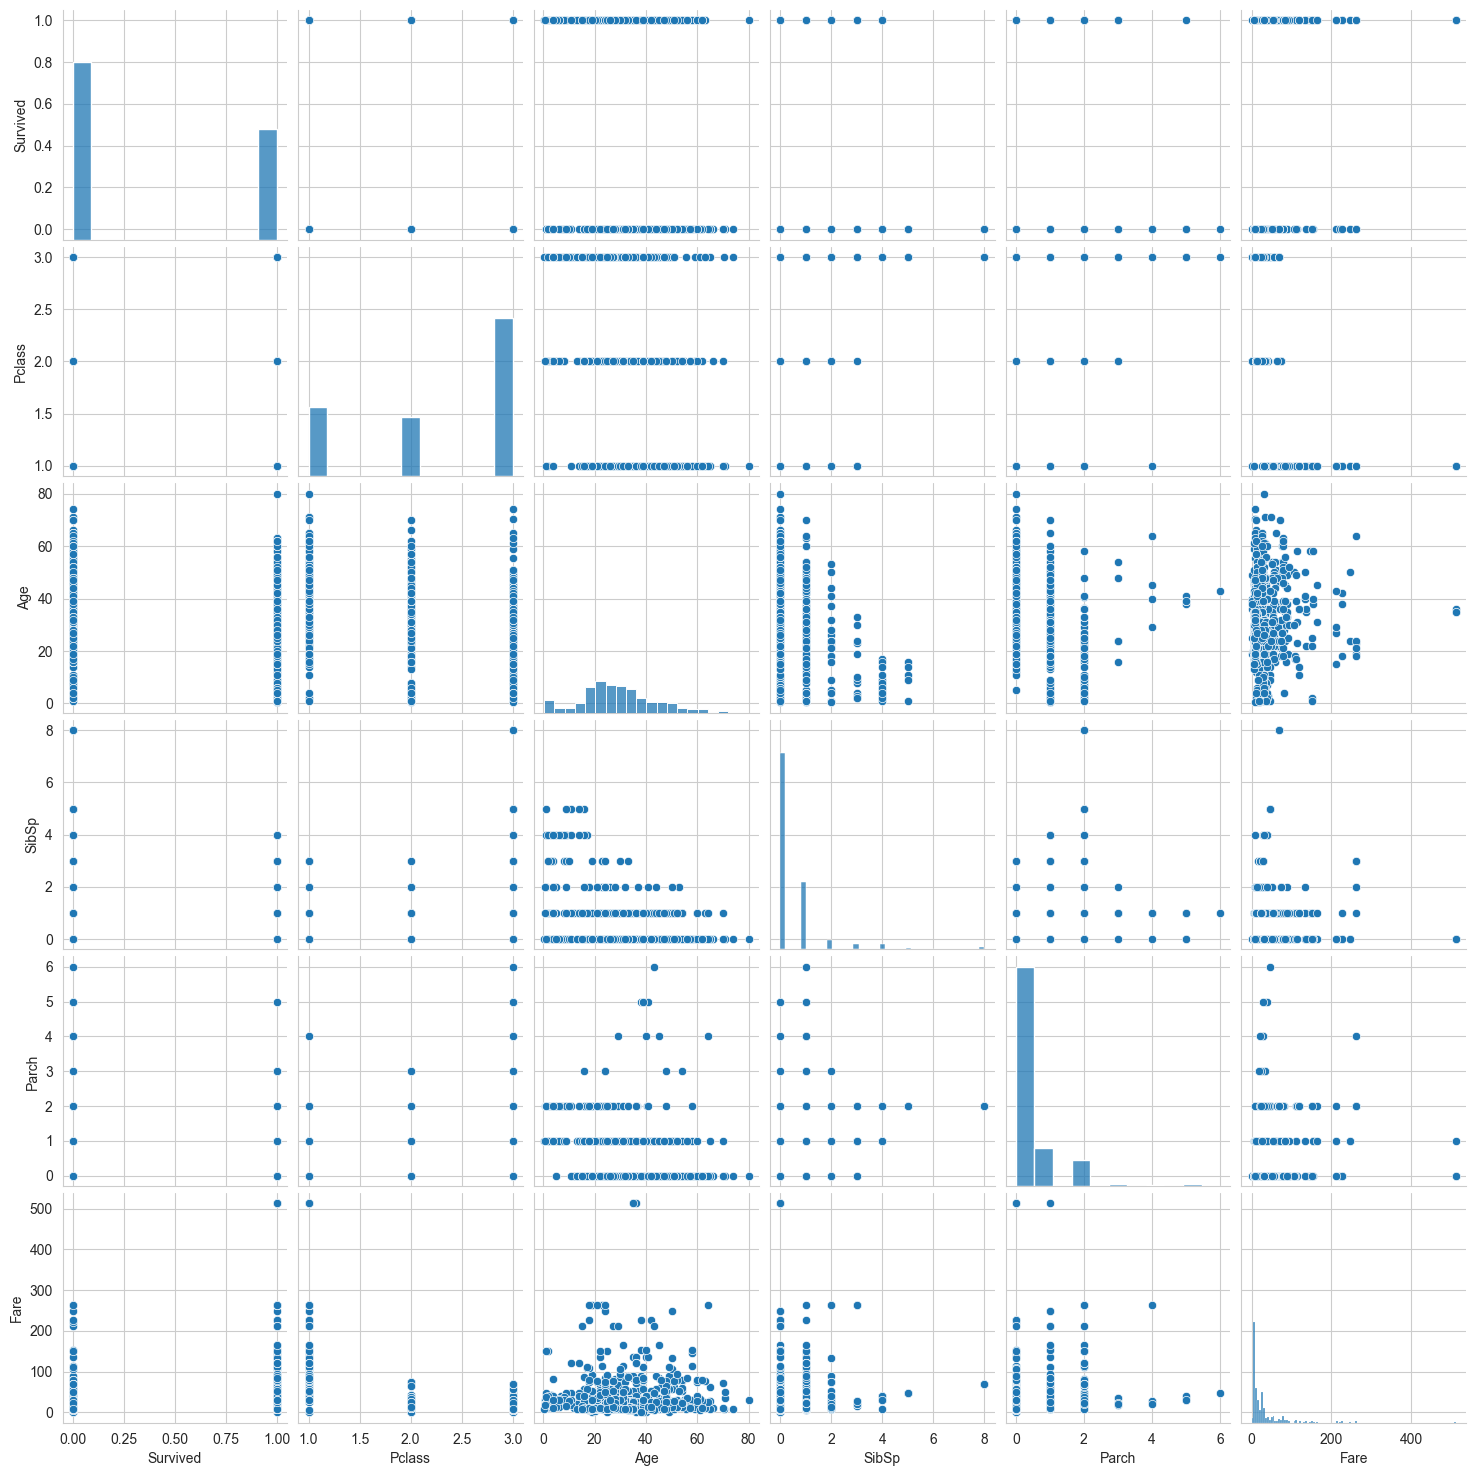

In [37]:
sns.pairplot(df_train)

### Data Cleaning

**1. Handling Dulicate Data**

In [38]:
# If you use the method sum() along with it, then it will return the total number of the duplicates in the dataset
df_train.duplicated().sum()

0

**2. Handling missing value (Categorical Data and Numerical Data)**

In [39]:
df_train.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


<Axes: ylabel='PassengerId'>

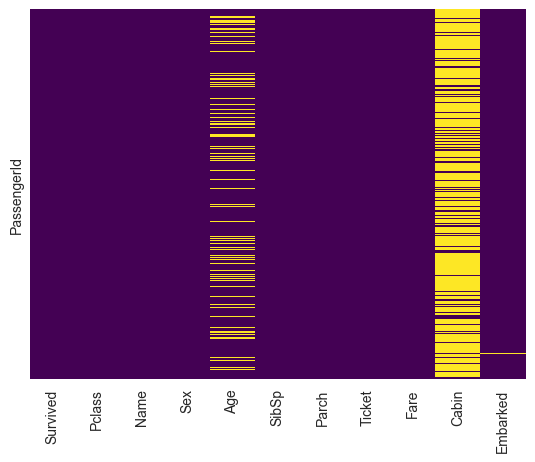

In [40]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False, cmap="viridis")
# From the below graph it is cleary visible that most of the null values are available in colun AGE and CABIN

In [41]:
# lets find out the percentage of misssing vale in each column
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000
Cabin,Cabin,77.104377


As we see from above that AGE data is only mising around 20% and we have to find that can we replace these Nan value
with some other value . So we need to find how can we replace these?.

In [42]:
# Now we will drop these missing value
df_train1=df_train.dropna(subset=["Age","Embarked"],axis=0).copy()

In [43]:
df_train1.shape

(712, 11)

In [44]:
percent_missing = df_train1.isnull().sum() * 100 / len(df_train1)
missing_value_df1 = pd.DataFrame({'column_name': df_train1.columns,
                                 'percent_missing': percent_missing})
missing_value_df1

,column_name,percent_missing
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000
Cabin,Cabin,74.297753


In [45]:
df_train1.drop("Cabin",axis=1,inplace=True)

In [46]:
df_train1.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [47]:
percent_missing = df_train1.isnull().sum() * 100 / len(df_train1)
missing_value_df1 = pd.DataFrame({'column_name': df_train1.columns,
                                 'percent_missing': percent_missing})
missing_value_df1

,column_name,percent_missing
Survived,Survived,0.0
Pclass,Pclass,0.0
Name,Name,0.0
Sex,Sex,0.0
Age,Age,0.0
SibSp,SibSp,0.0
Parch,Parch,0.0
Ticket,Ticket,0.0
Fare,Fare,0.0
Embarked,Embarked,0.0


**3. Handling Outliers**

In [48]:
df_train1["Age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Fare'>

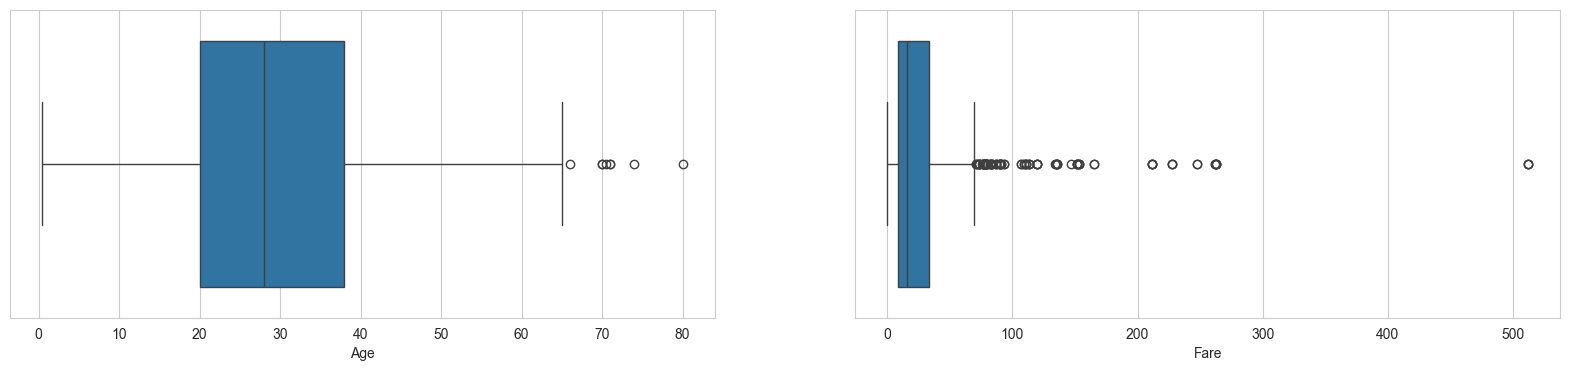

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize = (20,4))
sns.boxplot(x="Age",data=df_train1,ax=ax1)
sns.boxplot(x="Fare",data=df_train1,ax=ax2)

upper_limit :  73.12089139759976
lower_limit :  -13.836706004341348
Mean Value :  29.64209269662921
Median Value :  28.0
1st Standard Deviation :  14.49293290032352


C:\Users\HP\AppData\Local\Temp\ipykernel_15044\1574557967.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train1["Age"], ax=ax_hist,kde=False,norm_hist=True)


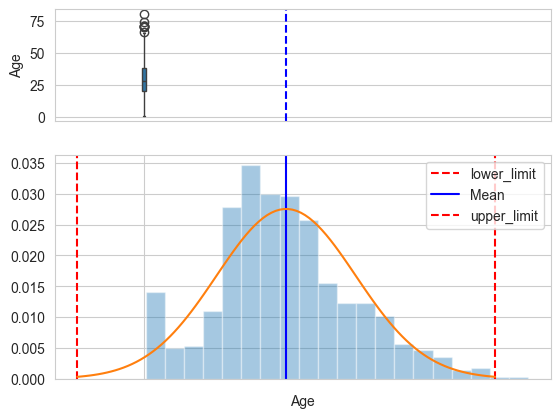

In [50]:
from scipy.stats import norm
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

median=df_train1.Age.median()
mean=df_train1.Age.mean()
std = df_train1.Age.std()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(df_train1["Age"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(df_train1["Age"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [51]:
df_train1_Age_outlier = df_train1[(df_train1.Age>upper_limit) | (df_train1.Age<lower_limit)]
df_train1_Age_outlier

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,S


In [52]:
#assigning nan to the outliers
df_train1['Age'].values[df_train1['Age'] > upper_limit] = np.nan
df_train1['Age'].values[df_train1['Age'] < lower_limit] = np.nan

In [53]:
df_train1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         2
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [54]:
#imputing nan values with mean value
#df_train1['Age']=df_train1.Age.fillna(df_train1.Age.mean())
# As we are preparing our base model and outlier values are also very few so we will delete these outlier values
df_train1.dropna(inplace=True)

In [55]:
df_train1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [56]:
df_train1.shape

(710, 10)